# Proyecto del Día 10 - Dashboard de un Análisis Exploratorio de Datos con Seaborn

## Introducción
Este notebook tiene como objetivo demostrar cómo utilizar Seaborn para **crear visualizaciones complejas y atractivas para el análisis exploratorio de datos** utilizando el dataset de `diamonds`, pertenenciente a la librería **Seaborn** en Python. Este dashboard incluirá visualizaciones que muestren:
* relaciones estadísticas
* distribuciones de variables
* comparaciones entre categorías

El estudiante deberá:
1. Cargar el dataset `diamonds` de Seaborn
2. Realizar un **análisis exploratorio** preliminar para familiarizarse con los datos
3. Crear visualizaciones que incluyan:
    * Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
    * Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
    * Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
4. Utilizar `jointplot()` para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional
5. Emplear `pairplot()` para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta
6. Ajustar los estilos y temas de las visualizaciones para mejorar la estética y legibilidad
7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos

No dejes de usar tu creatividad, explora, diviértete y en el medio de todo eso, aprende.

## IMPORTACION DE LIBRERIAS Y LECTURA DE DATOS 

In [114]:
#importation of libraries and loading of dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data=sns.load_dataset('diamonds')
data=data.iloc[:,0:7]
data

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


## ANALISIS EXPLORATORIO

In [116]:
#let's get some info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 1.8 MB


In [118]:
data.describe()

,carat,depth,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722
std,0.474011,1.432621,2.234491,3989.439738
min,0.200000,43.000000,43.000000,326.000000
25%,0.400000,61.000000,56.000000,950.000000
50%,0.700000,61.800000,57.000000,2401.000000
75%,1.040000,62.500000,59.000000,5324.250000
max,5.010000,79.000000,95.000000,18823.000000


## GRAFICOS

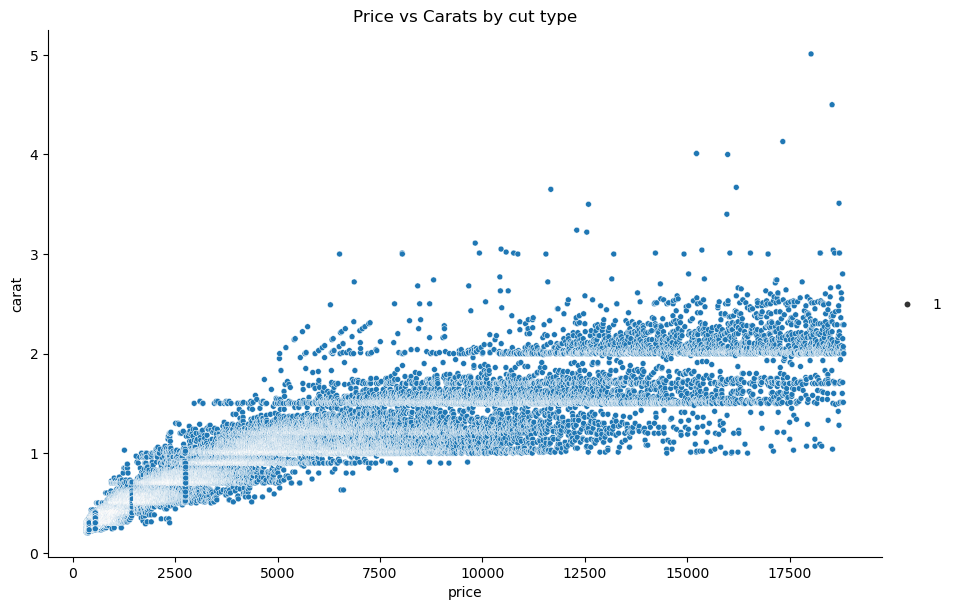

In [120]:
#plots
g=sns.relplot(data=data, x='price', y='carat', size=1, height=6, aspect=1.5)
g.set(title='Price vs Carats by cut type')


From the graphic we get that the greater the carat the greater the price in a exponencial way,
meaning that the price of a diamond increases greatly by every increment of carat 

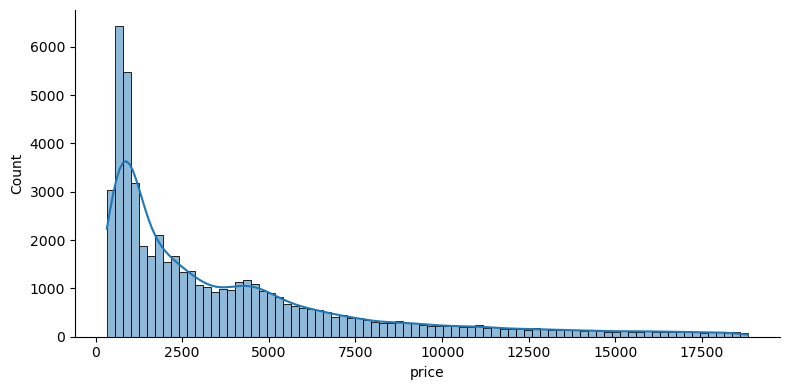

In [121]:
sns.displot(data, x='price', kde=True, height=4, aspect=2)

We can observe how the distribution of price per diamond looks. As expected the vast majority of them are the cheapest but, interestingly we find a
plain area in those diamonds valued for 4000 dollars. The rest of diamonds price distribution keeps reducing as prices rise. 

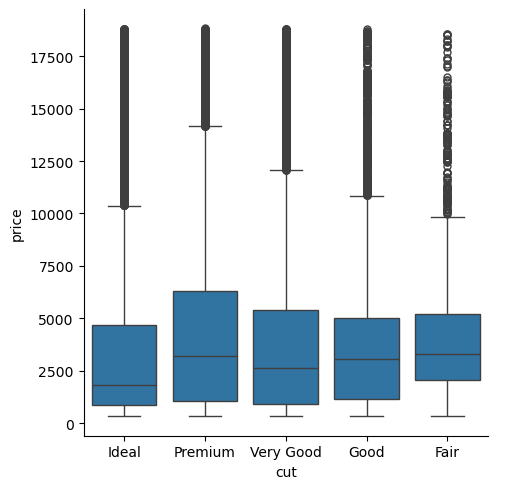

In [124]:
sns.catplot(data=data, x='cut', y='price', kind='box')

with this visual, we can observe the distribution of diamonds price by type of cut. As many black cicles appear this means that plenty of outliers are 
amongst our data. Meaning that we have many extraordinary dimaonds in a data set. Also, observe that premiun cut has the largest variance. On top of 
that 25% top price premiun cut diamonds are worth more than 6500. 

In [132]:
data.clarity

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

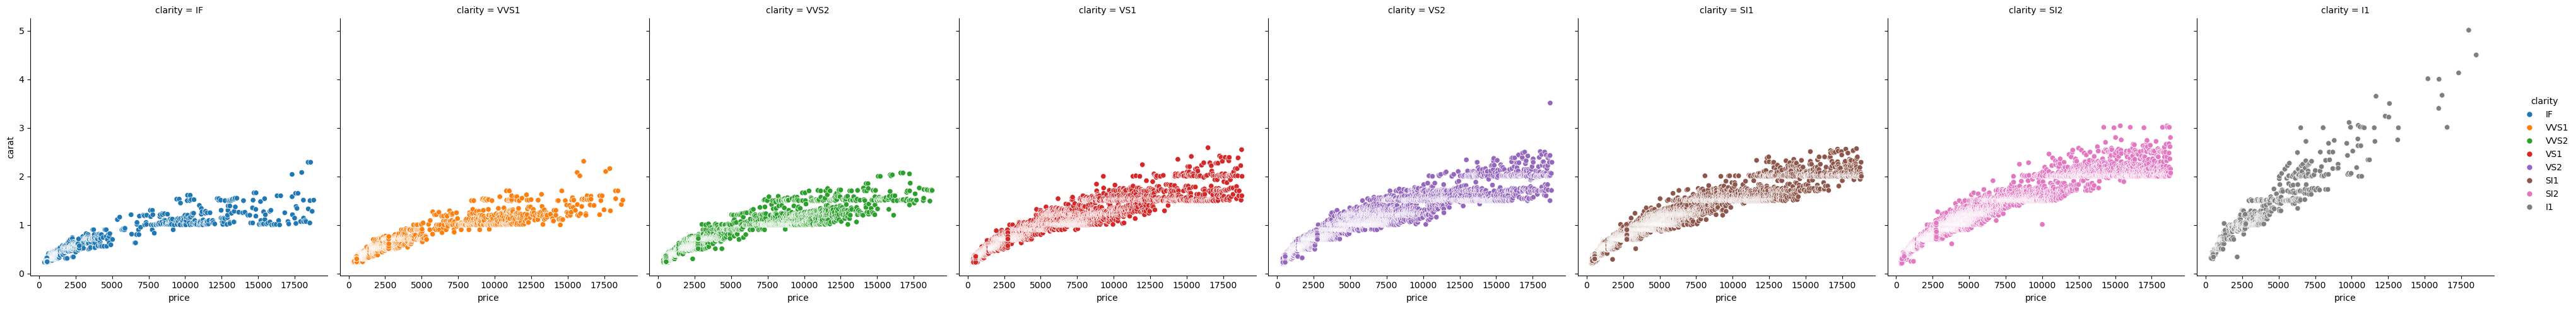

In [126]:

sns.relplot(data=data, x='price', y='carat', col='clarity', hue='clarity')

in this graphics we discover interesting patterns of behaviour in terms of price and clarity. Observe that starting by the level of clarity 'IF' the
price rapidly skyrockets, and that as we advance towards clarity level 'I1' prices are more prone to resemble the line y=x, meaning that clarity has a 
major effects on how diamonds are priced. To be more specific, 'IF' clarity level diamonds are the most valued.

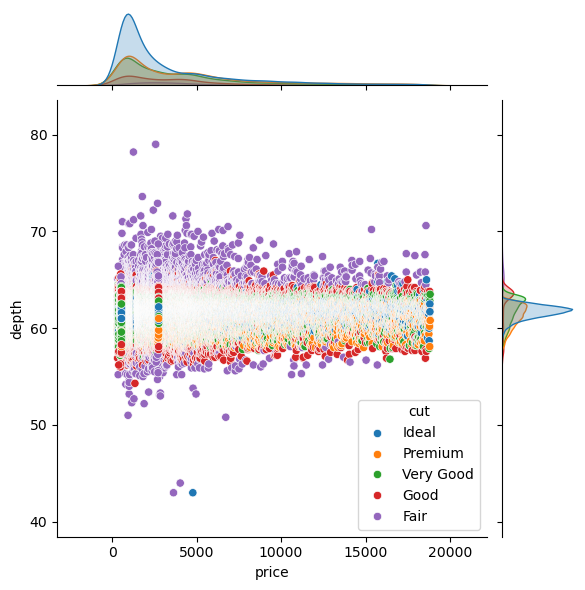

In [128]:
sns.jointplot(data=data, x='price', y='depth',hue='cut')

with this graphic we explore other aspect of diamond, the depth, along with their price. We can distinguish distributions by cut type. See that in terms
of depth the ideal cut is very much close to 61-62 value. It doesn't feel adventurous to think that ideal cut means 61-62 depth. 

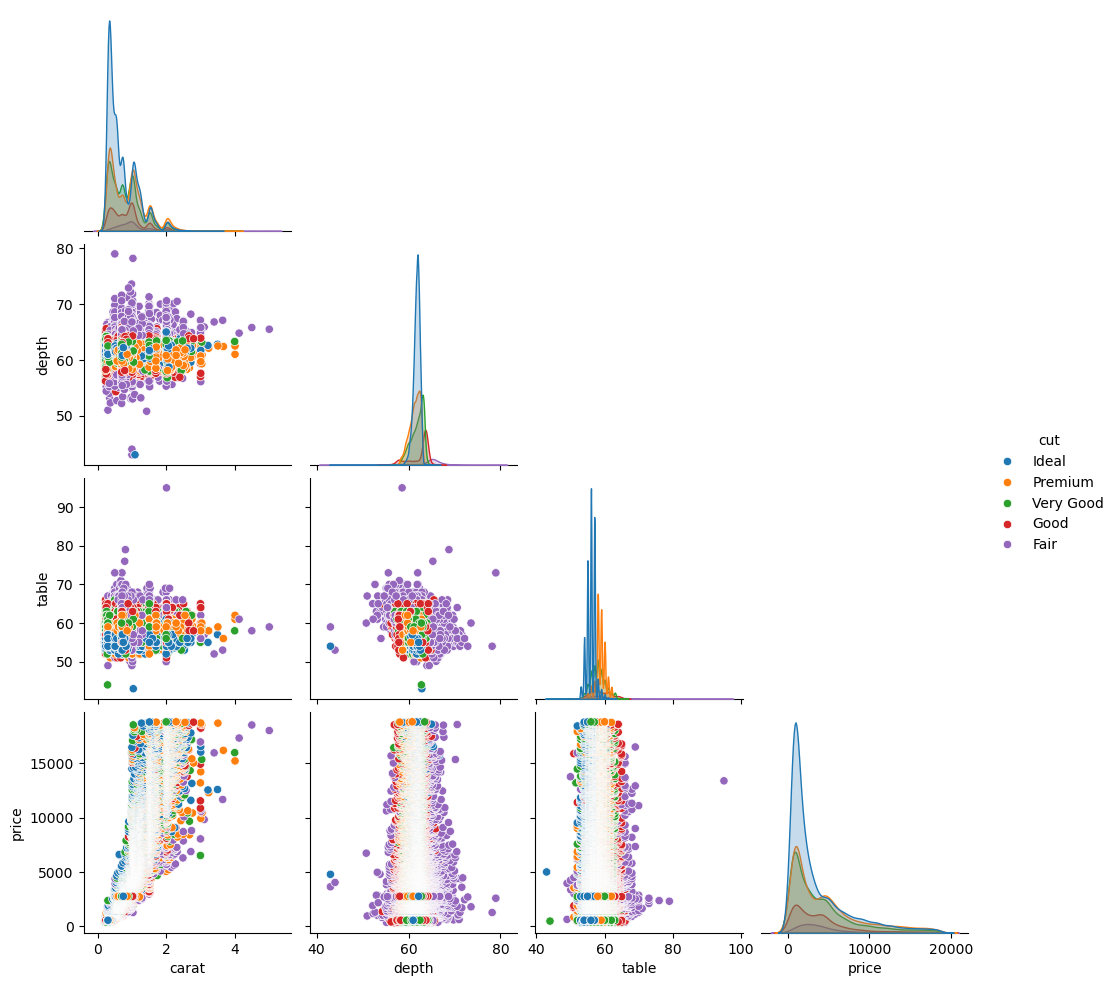

In [130]:
sns.pairplot(data, hue="cut", corner = True)